
# **Microsoft Stock Prediction**

Steps to build stock prediction model


*   Data Preprocessing
*   Building the RNN
*   Making the prediction and visualization


# **Data Preprocessing**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSFT.csv to MSFT (1).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['MSFT.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-17,46.549999,46.779999,46.259998,46.619999,42.192226,29467100
1,2015-07-20,46.650002,47.130001,46.439999,46.919998,42.463726,30631900
2,2015-07-21,46.779999,47.330002,46.480000,47.279999,42.789539,42781900
3,2015-07-22,45.439999,46.930000,45.200001,45.540001,41.214806,59152400
4,2015-07-23,45.270000,46.230000,45.099998,46.110001,41.730663,33934000


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2020-07-10,213.619995,214.080002,211.080002,213.669998,213.669998,26177600
1255,2020-07-13,214.479996,215.800003,206.500000,207.070007,207.070007,38135600
1256,2020-07-14,206.130005,208.850006,202.029999,208.350006,208.350006,37591800
1257,2020-07-15,209.559998,211.330002,205.029999,208.039993,208.039993,32179400
1258,2020-07-16,205.399994,205.699997,202.309998,203.919998,203.919998,29899400


In [ ]:
# Split Training data
data_training = data[data['Date']<'2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-17,46.549999,46.779999,46.259998,46.619999,42.192226,29467100
1,2015-07-20,46.650002,47.130001,46.439999,46.919998,42.463726,30631900
2,2015-07-21,46.779999,47.330002,46.480000,47.279999,42.789539,42781900
3,2015-07-22,45.439999,46.930000,45.200001,45.540001,41.214806,59152400
4,2015-07-23,45.270000,46.230000,45.099998,46.110001,41.730663,33934000
...,...,...,...,...,...,...,...
866,2018-12-24,97.680000,97.970001,93.980003,94.129997,92.248878,43935200
867,2018-12-26,95.139999,100.690002,93.959999,100.559998,98.550377,51634800
868,2018-12-27,99.300003,101.190002,96.400002,101.180000,99.158005,49498500
869,2018-12-28,102.089996,102.410004,99.519997,100.389999,98.383781,38196300


In [ ]:
# Split Testing data
data_test = data[data['Date']>='2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
871,2019-01-02,99.550003,101.750000,98.940002,101.120003,99.099190,35329300
872,2019-01-03,100.099998,100.190002,97.199997,97.400002,95.453529,42579100
873,2019-01-04,99.720001,102.510002,98.930000,101.930000,99.893005,44060600
874,2019-01-07,101.639999,103.269997,100.980003,102.059998,100.020401,35656100
875,2019-01-08,103.040001,103.970001,101.709999,102.800003,100.745613,31514400
...,...,...,...,...,...,...,...
1254,2020-07-10,213.619995,214.080002,211.080002,213.669998,213.669998,26177600
1255,2020-07-13,214.479996,215.800003,206.500000,207.070007,207.070007,38135600
1256,2020-07-14,206.130005,208.850006,202.029999,208.350006,208.350006,37591800
1257,2020-07-15,209.559998,211.330002,205.029999,208.039993,208.039993,32179400


In [ ]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,46.549999,46.779999,46.259998,46.619999,29467100
1,46.650002,47.130001,46.439999,46.919998,30631900
2,46.779999,47.330002,46.480000,47.279999,42781900
3,45.439999,46.930000,45.200001,45.540001,59152400
4,45.270000,46.230000,45.099998,46.110001,33934000


In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.08136586, 0.05693707, 0.08695648, 0.08184719, 0.17246668],
       [0.08269976, 0.06169318, 0.0893498 , 0.08583973, 0.18158081],
       [0.08443375, 0.06441095, 0.08988165, 0.0906308 , 0.27665012],
       ...,
       [0.78498072, 0.79630387, 0.75362321, 0.80795846, 0.32920506],
       [0.82219551, 0.81288224, 0.79510699, 0.79744474, 0.24076947],
       [0.81152464, 0.81274632, 0.80733947, 0.81314878, 0.20147025]])

In [ ]:
X_train = []
y_train = []

In [ ]:
training_data.shape[0]

871

In [ ]:
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  y_train.append(training_data[i, 0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((811, 60, 5), (811,))

# **Building LSTM**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units= 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units= 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units= 120, activation = 'relu')) # dont need return_sequence bcuz final output
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))  # Dense output layer



In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)              

In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
26/26 [==============================] - 4s 157ms/step - loss: 0.0711
Epoch 2/10
26/26 [==============================] - 4s 170ms/step - loss: 0.0129
Epoch 3/10
26/26 [==============================] - 4s 156ms/step - loss: 0.0108
Epoch 4/10
26/26 [==============================] - 4s 155ms/step - loss: 0.0098
Epoch 5/10
26/26 [==============================] - 4s 155ms/step - loss: 0.0089
Epoch 6/10
26/26 [==============================] - 4s 154ms/step - loss: 0.0085
Epoch 7/10
26/26 [==============================] - 4s 154ms/step - loss: 0.0071
Epoch 8/10
26/26 [==============================] - 4s 154ms/step - loss: 0.0076
Epoch 9/10
26/26 [==============================] - 4s 157ms/step - loss: 0.0069
Epoch 10/10
26/26 [==============================] - 4s 155ms/step - loss: 0.0080


In [ ]:
## Now we will test and predict stock price

## Prepare test dataset
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
871,2019-01-02,99.550003,101.750000,98.940002,101.120003,99.099190,35329300
872,2019-01-03,100.099998,100.190002,97.199997,97.400002,95.453529,42579100
873,2019-01-04,99.720001,102.510002,98.930000,101.930000,99.893005,44060600
874,2019-01-07,101.639999,103.269997,100.980003,102.059998,100.020401,35656100
875,2019-01-08,103.040001,103.970001,101.709999,102.800003,100.745613,31514400


In [ ]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
811,2018-10-04,114.610001,114.760002,111.629997,112.790001,110.060501,34821700
812,2018-10-05,112.629997,113.169998,110.639999,112.129997,109.416473,29068900
813,2018-10-08,111.660004,112.029999,109.339996,110.849998,108.167450,29640600
814,2018-10-09,111.139999,113.080002,110.800003,112.260002,109.543335,26198600
815,2018-10-10,111.239998,111.500000,105.790001,106.160004,103.590958,61376300
816,2018-10-11,105.349998,108.930000,104.199997,105.910004,103.347000,63904300
817,2018-10-12,109.010002,111.239998,107.120003,109.570000,106.918419,47742100
818,2018-10-15,108.910004,109.480003,106.949997,107.599998,104.996094,32068100
819,2018-10-16,109.540001,111.410004,108.949997,111.000000,108.313820,31610200
820,2018-10-17,111.680000,111.809998,109.550003,110.709999,108.030838,26548200


In [ ]:
past_60_days = data_training.tail(60)

In [ ]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,114.610001,114.760002,111.629997,112.790001,34821700
1,112.629997,113.169998,110.639999,112.129997,29068900
2,111.660004,112.029999,109.339996,110.849998,29640600
3,111.139999,113.080002,110.800003,112.260002,26198600
4,111.239998,111.500000,105.790001,106.160004,61376300


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.98919572, 0.98070393, 0.95612282, 0.96247006, 0.21436446],
       [0.9627851 , 0.95909768, 0.9429597 , 0.9536864 , 0.16935091],
       [0.94984668, 0.94360645, 0.92567472, 0.93665154, 0.17382425],
       ...,
       [2.20995079, 2.25927444, 2.15809068, 2.2342295 , 0.23603948],
       [2.25570233, 2.29297462, 2.19797899, 2.2301037 , 0.19368943],
       [2.20021341, 2.21646959, 2.16181358, 2.17527278, 0.17584927]])

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i, 0])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((388, 60, 5), (388,))

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
scaler.scale_

array([1.33386693e-02, 1.35888028e-02, 1.32961044e-02, 1.33084908e-02,
       7.82463430e-09])

In [ ]:
scale = 1/1.33386693e-02
scale

74.96999719454773

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

In [ ]:
y_pred

array([[ 64.435356],
       [ 63.888996],
       [ 63.35257 ],
       [ 62.841034],
       [ 62.36795 ],
       [ 61.947716],
       [ 61.59159 ],
       [ 61.305138],
       [ 61.0906  ],
       [ 60.943935],
       [ 60.861526],
       [ 60.840622],
       [ 60.877853],
       [ 60.970737],
       [ 61.114124],
       [ 61.30174 ],
       [ 61.52636 ],
       [ 61.782566],
       [ 62.06188 ],
       [ 62.35219 ],
       [ 62.640636],
       [ 62.913284],
       [ 63.158295],
       [ 63.3709  ],
       [ 63.555523],
       [ 63.71907 ],
       [ 63.867813],
       [ 64.006096],
       [ 64.13815 ],
       [ 64.2686  ],
       [ 64.40172 ],
       [ 64.540276],
       [ 64.68674 ],
       [ 64.84353 ],
       [ 65.01124 ],
       [ 65.1879  ],
       [ 65.37622 ],
       [ 65.57891 ],
       [ 65.79949 ],
       [ 66.03947 ],
       [ 66.299065],
       [ 66.57737 ],
       [ 66.87178 ],
       [ 67.17853 ],
       [ 67.49247 ],
       [ 67.80745 ],
       [ 68.11563 ],
       [ 68.4

# **Visualization**

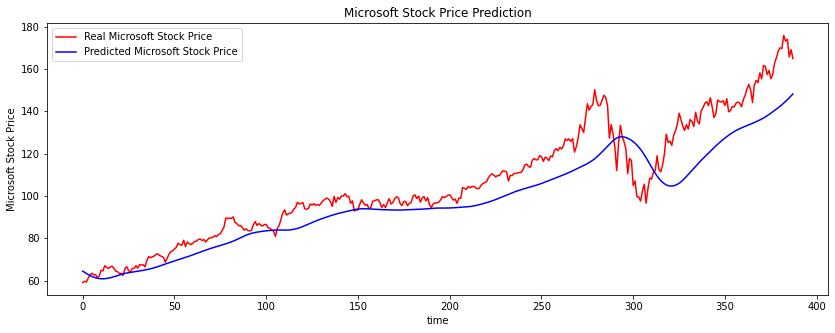

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = "Real Microsoft Stock Price")
plt.plot(y_pred, color = 'blue', label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()

